<a href="https://colab.research.google.com/github/piusAI/DeepLearning_Basic/blob/main/Chap05_04_Softmax_With_Loss.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### SoftMax With Loss

#### Partial Differential

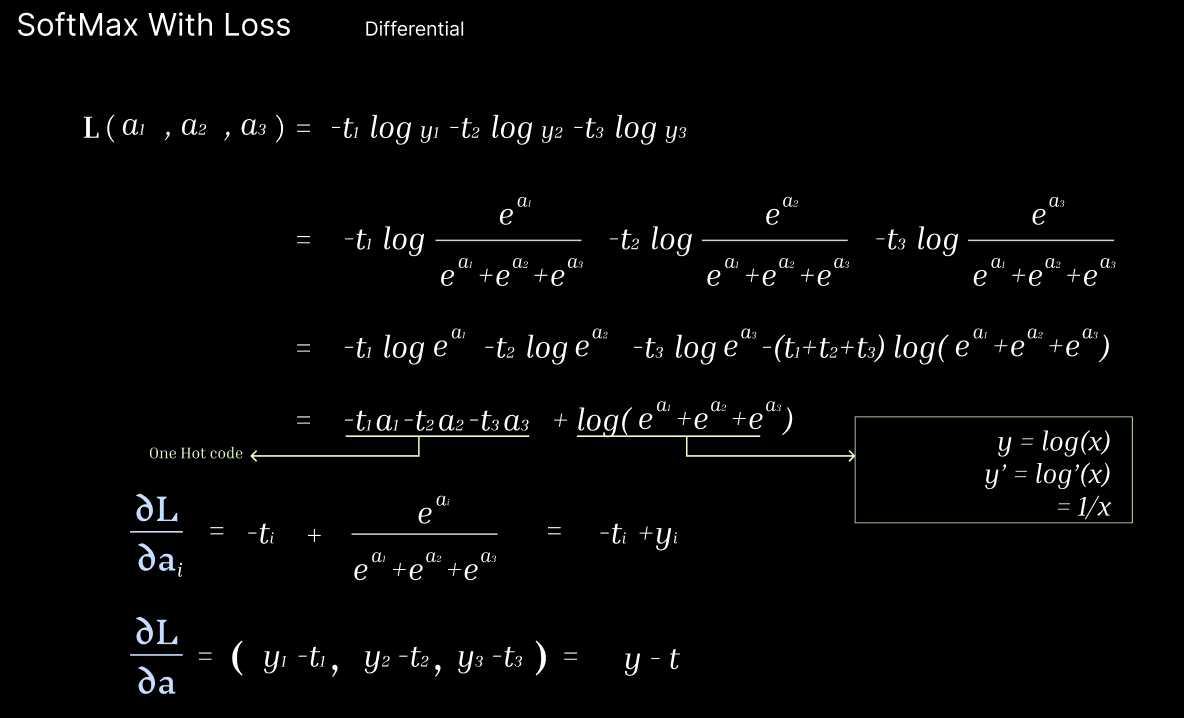

합성함수의 도함수를 구하면 원래 더 복잡하지만,

Soft max, CEE이후의 미분(도함수)이 두 확률 분포의 차이가 된다!


*   y -t
*  Soft Max에서 출력한 확률 (y) - Label(t)

#### Calc Graph

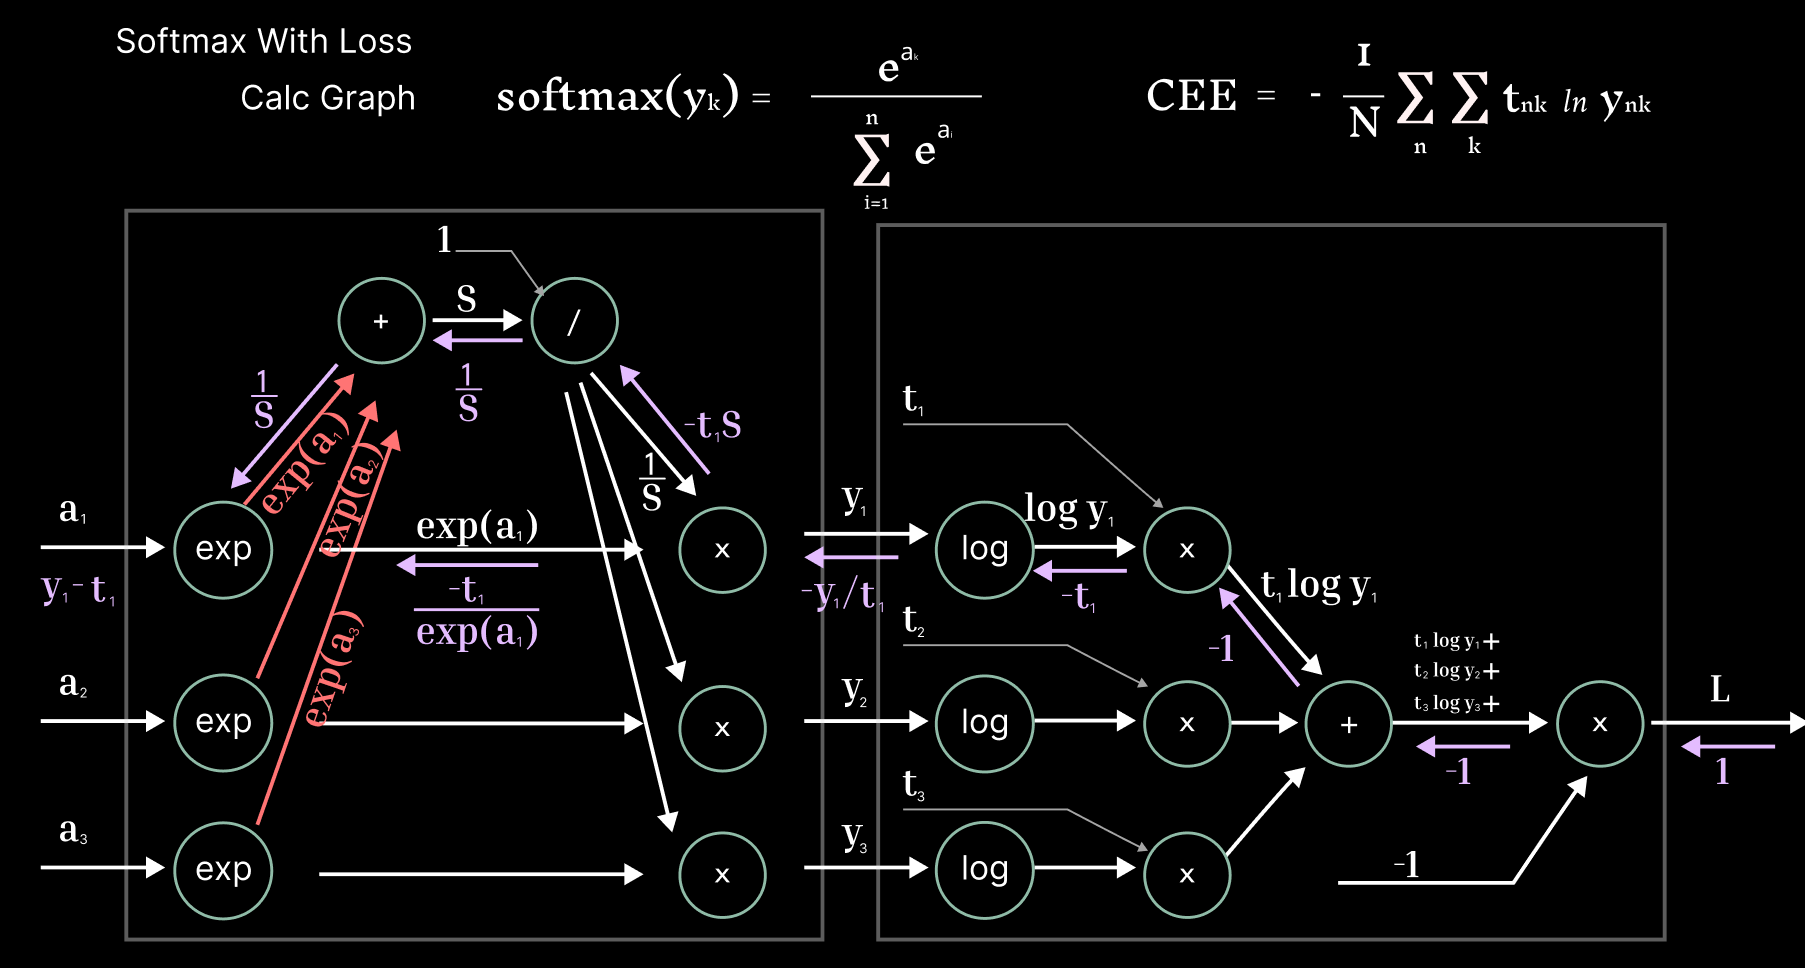

In [1]:
import numpy as np

def softmax(x):
  if x.ndim==2:
    x = x - np.max(axis=1, keepdims=1)
    x = np.exp(x)
    out = x / np.sum(axis=1, keepdims=1)
  elif x.ndim == 1:
    x = x - np.max(x)
    x = np.exp(x)
    out = x / np.sum(x)
  return out

def CEE(y,t):
  if y.ndim ==1:
    t = t.reshape(1, t.size)
    y = y.reshape(1, y.size)
  if t.size == y.size:
    t = t.argmax(axis=1)
  batch_size = y.shape[0]
  return -np.sum(np.log(y[np.arange(batch_size), t]))/ batch_size

In [4]:
import numpy as np
class SoftmaxWithLoss:
  def __init__(self):
    self.loss = None
    self.y = None
    self.t = None # 정답 레이블 : One-Hot Code
  def forward(self, x, t):
    self.t = t
    self.y = softmax(x)
    self.loss = CEE(self.y, self.t)

    return self.loss
  def backward(self, dout=1):
    batch_size = self.t.shape[0]
    if self.t.size == self.y.size : # Label, One-Hot-Code
      dx = (self.y - self.t) / batch_size
    else :
        dx =self.y.copy()
        dx[np.arange(batch_size), self.t] -= 1
        dx = dx / batch_size
        return dx

SoftMax WithLoss는 학습해야할 Parameter가 없음!


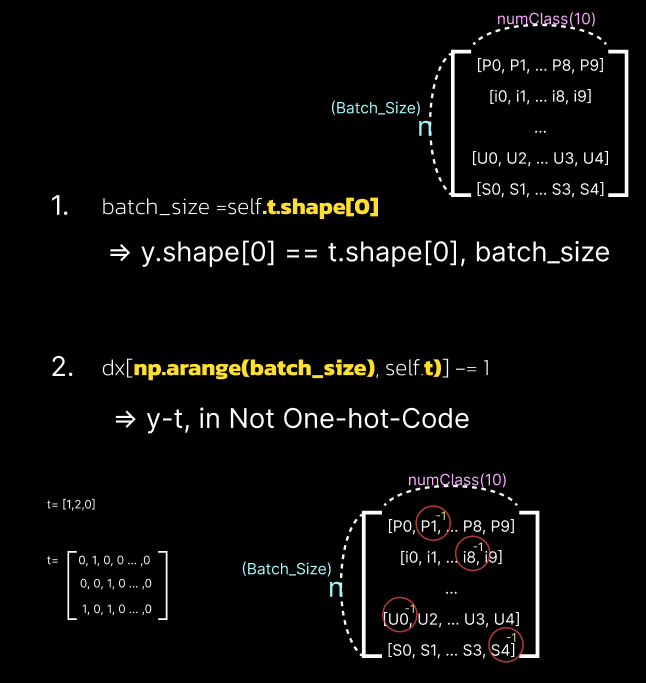